In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 5.4 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/20191002-reviews.csv')

# Data Acquisition

Penjelasan Label
* 1: rating Buruk 1
* 2: rating Buruk 2
* 3: rating Netral
* 4: rating Bagus 1
* 5: rating Bagus 2

In [ ]:
data = data.dropna(subset=["reviewContent"])
rating1 = data[data.rating == 1]
data_rat1 = rating1.iloc[:1000, :]
rating2 = data[data.rating == 2]
data_rat2 = rating2.iloc[:1000, :]
rating3 = data[data.rating == 3]
data_rat3 = rating3.iloc[:1000, :]
rating4 = data[data.rating == 4]
data_rat4 = rating4.iloc[:1000, :]
rating5= data[data.rating == 5]
data_rat5 = rating5.iloc[:1000, :]
data = data_rat1.append([data_rat2,data_rat3,data_rat4,data_rat5],ignore_index=True)
data = data[['reviewContent','rating']]

data.head()

,reviewContent,rating
0,bima,1
1,baru 10 bulan layarnya dah bergaris,1
2,"Mau tanya ini cicilnya pake apa ya,cc bkn?",1
3,Pengirim barang tidak sesuai janji. Katanya ex...,1
4,Bagaimana tv LED saya merek Sharp 24 hitam LC ...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewContent  5000 non-null   object
 1   rating         5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
print('Total Jumlah Review:', data.shape[0], 'data\n')
print('terdiri dari (rating):')
print('-- [1] Rating Buruk 1\t:', data[data.rating == 1].shape[0], 'data')
print('-- [2] Rating Buruk 2\t:', data[data.rating == 2].shape[0], 'data')
print('-- [3] Rating Netral\t:', data[data.rating == 3].shape[0], 'data')
print('-- [4] Rating Bagus 1\t:', data[data.rating == 4].shape[0], 'data')
print('-- [5] Rating Bagus 2\t:', data[data.rating == 5].shape[0], 'data')

Total Jumlah Review: 5000 data

terdiri dari (rating):
-- [1] Rating Buruk 1	: 1000 data
-- [2] Rating Buruk 2	: 1000 data
-- [3] Rating Netral	: 1000 data
-- [4] Rating Bagus 1	: 1000 data
-- [5] Rating Bagus 2	: 1000 data


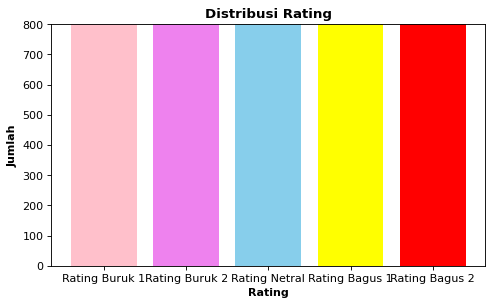

In [ ]:
height = data['rating'].value_counts()
labels = ('Rating Buruk 1', 'Rating Buruk 2', 'Rating Netral', 'Rating Bagus 1', 'Rating Bagus 2')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,800)
plt.title('Distribusi Rating', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['pink', 'violet', 'skyblue', 'yellow','red'])
plt.xticks(y_pos, labels)
plt.show()

# Text Preprocessing

## Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

## Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-01 14:08:32--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-04-01 14:08:32 (5.65 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['barang','kirim','lazada','gb','dn','sya']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

## Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['reviewContent'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 16min 22s, sys: 3.43 s, total: 16min 25s
Wall time: 16min 32s


In [ ]:
#Optional aj yah,
#Simpan data , jika anda ingin menggunakan data clean_teks
data.to_csv('clean_data.csv')

In [ ]:
data

,reviewContent,rating,clean_teks
0,bima,1,bima
1,baru 10 bulan layarnya dah bergaris,1,layar gar
2,"Mau tanya ini cicilnya pake apa ya,cc bkn?",1,cicil pakai yacc
3,Pengirim barang tidak sesuai janji. Katanya ex...,1,kirim sesuai janji express jumat rabu moga bar...
4,Bagaimana tv LED saya merek Sharp 24 hitam LC ...,1,televisi led merek sharp hitam lc lei mati tot...
...,...,...,...
4995,"barang sampai sesuai jadwal, seller ok, kurir ...",5,sesuai jadwal jual ok kurir sahabat stelah tes...
4996,paket lengkap murahnya TOP,5,paket lengkap murah top
4997,Very good,5,very good
4998,Good,5,good


# Feature Engineering

In [ ]:
# Pisahkan kolom feature dan target
X = data['clean_teks']
y = data['rating']

In [ ]:
X

0                                                    bima
1                                               layar gar
2                                        cicil pakai yacc
3       kirim sesuai janji express jumat rabu moga bar...
4       televisi led merek sharp hitam lc lei mati tot...
                              ...                        
4995    sesuai jadwal jual ok kurir sahabat stelah tes...
4996                              paket lengkap murah top
4997                                            very good
4998                                                 good
4999     mantapp sesuai pesan respon cepat memuaskansuwun
Name: clean_teks, Length: 5000, dtype: object

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4995    5
4996    5
4997    5
4998    5
4999    5
Name: rating, Length: 5000, dtype: int64

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
#save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

#Save vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.pkl","wb"))

In [ ]:
#Menampilkan vocabulary dari TF-IDF
vec_TF_IDF.vocabulary_

{'bima': 608,
 'layar': 2885,
 'gar': 1813,
 'cicil': 957,
 'pakai': 3863,
 'yacc': 5773,
 'kirim': 2611,
 'sesuai': 4816,
 'janji': 2258,
 'express': 1631,
 'jumat': 2346,
 'rabu': 4300,
 'moga': 3362,
 'barang': 425,
 'awet': 272,
 'televisi': 5237,
 'led': 2942,
 'merek': 3277,
 'sharp': 4846,
 'hitam': 2062,
 'lc': 2931,
 'lei': 2945,
 'mati': 3179,
 'total': 5438,
 'mana': 3116,
 'hubung': 2098,
 'bantu': 414,
 'mohon': 3364,
 'bijak': 602,
 'solusi': 4994,
 'garansi': 1816,
 'terimakasih': 5288,
 'capek': 866,
 'transfer': 5459,
 'pesan': 4060,
 'tolak': 5426,
 'laptop': 2866,
 'milik': 3307,
 'spesifikasi': 5039,
 'bagus': 307,
 'harga': 2001,
 'jangkau': 2256,
 'tab': 5150,
 'utama': 5606,
 'produk': 4204,
 'emang': 1567,
 'intel': 2190,
 'core': 1019,
 'salah': 4549,
 'judul': 2335,
 'pas': 3911,
 'dinyalain': 1321,
 'tanggung': 5187,
 'pasang': 3914,
 'tembok': 5244,
 'memasanga': 3213,
 'terima': 5284,
 'kasih': 2440,
 'kapasitasy': 2420,
 'bagusss': 335,
 'aturany': 256,
 '

In [ ]:
#Melihat Jumlah Fitur
print (len(vec_TF_IDF.get_feature_names_out()))

5822


In [ ]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec_TF_IDF.get_feature_names_out())

['aada' 'aamiin' 'ababila' ... 'zone' 'zonk' 'zoonkpdhal']


In [ ]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aada,aamiin,ababila,abal,abalabal,abang,abidin,abizz,abkir,acara,...,yulia,yure,yya,zada,zeb,zen,zippernya,zone,zonk,zoonkpdhal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [ ]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 3000)
X_kbest_features = chi2_features.fit_transform(x_train, y_train)

# Reduced features
print('Original feature number:', x_train.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 5822
Reduced feature number: 3000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,1.171800
1,1.345005
2,1.941684
3,5.558319
4,1.209943
...,...
5817,3.033238
5818,2.477168
5819,1.850440
5820,1.387574


In [ ]:
#Menampilkan fitur beserta nilainya
feature =vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,1.171800,aada
1,1.345005,aamiin
2,1.941684,ababila
3,5.558319,abal
4,1.209943,abalabal
...,...,...
5817,3.033238,zen
5818,2.477168,zippernya
5819,1.850440,zone
5820,1.387574,zonk


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
307,99.367866,bagus
3136,87.635675,mantap
910,72.705281,cepat
2481,61.673650,kecewa
1900,60.455192,good
...,...,...
4300,0.188673,rabu
4727,0.144668,sekian
1165,0.138761,dengar
2389,0.106866,kalah


In [ ]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([False, False,  True, ...,  True, False, False])

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['ababila',
 'abal',
 'abang',
 'abkir',
 'acdc',
 'acer',
 'activation',
 'ada',
 'adain',
 'adaptor',
 'adatks',
 'adatp',
 'add',
 'aduh',
 'aduu',
 'ae',
 'aesuai',
 'afiat',
 'agakkecewa',
 'agat',
 'agian',
 'agst',
 'agustus',
 'ah',
 'ajaaaaa',
 'aju',
 'akh',
 'akses',
 'aksesoris',
 'aktifin',
 'aktivasi',
 'aktivasitaapi',
 'aktual',
 'akun',
 'akur',
 'akuu',
 'ala',
 'alam',
 'alamat',
 'alami',
 'alas',
 'alat',
 'alesan',
 'alhamdulillah',
 'alhamdulillahbarang',
 'alhasil',
 'alhirnya',
 'alhmdlh',
 'alhmdllah',
 'alhmdullah',
 'alias',
 'alih',
 'alkhirnya',
 'all',
 'almat',
 'almunium',
 'alteco',
 'aman',
 'amanah',
 'amanbaik',
 'amanbeneran',
 'amandan',
 'amanmatur',
 'amansemoga',
 'amin',
 'aminsemoga',
 'amnil',
 'ampir',
 'ampun',
 'an',
 'analog',
 'and',
 'anda',
 'android',
 'aneh',
 'aneka',
 'angge',
 'anggur',
 'angkat',
 'animasi',
 'anime',
 'anjing',
 'antar',
 'antena',
 'anter',
 'anti',
 'antivirus',
 'antivirusnya',
 'anycast',
 'ap',
 'apa',
 'a

In [ ]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features





{'bima': 608,
 'layar': 2885,
 'gar': 1813,
 'cicil': 957,
 'pakai': 3863,
 'yacc': 5773,
 'kirim': 2611,
 'sesuai': 4816,
 'express': 1631,
 'jumat': 2346,
 'moga': 3362,
 'barang': 425,
 'awet': 272,
 'televisi': 5237,
 'led': 2942,
 'merek': 3277,
 'sharp': 4846,
 'hitam': 2062,
 'mati': 3179,
 'total': 5438,
 'mana': 3116,
 'hubung': 2098,
 'bantu': 414,
 'mohon': 3364,
 'bijak': 602,
 'solusi': 4994,
 'garansi': 1816,
 'terimakasih': 5288,
 'transfer': 5459,
 'pesan': 4060,
 'tolak': 5426,
 'laptop': 2866,
 'bagus': 307,
 'harga': 2001,
 'jangkau': 2256,
 'tab': 5150,
 'produk': 4204,
 'emang': 1567,
 'core': 1019,
 'salah': 4549,
 'judul': 2335,
 'pas': 3911,
 'dinyalain': 1321,
 'tanggung': 5187,
 'pasang': 3914,
 'tembok': 5244,
 'memasanga': 3213,
 'terima': 5284,
 'kasih': 2440,
 'bagusss': 335,
 'kosong': 2713,
 'bnyakkk': 670,
 'firusss': 1686,
 'kampret': 2406,
 'baca': 294,
 'kemas': 2525,
 'apa': 186,
 'lihat': 2996,
 'curiga': 1056,
 'kayak': 2459,
 'pecah': 3936,
 'buk

In [ ]:
#Melihat jumlah fitur baru
#Ini sesuai dengan nilai k pada chi-square
len(new_selected_features)

3000

In [ ]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [ ]:
#Menampilkan Fitur-fitur yang sudah diseleksi
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,ababila,abal,abang,abkir,acdc,acer,activation,ada,adain,adaptor,...,yeee,ygcabang,yh,yulia,yure,zada,zeb,zen,zippernya,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modelling (Machine Learning)

In [ ]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#Algoritme yang dikomparasi
from sklearn import svm
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x = selected_x
y = data.rating
#Memisihkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 4000
Banyak data x_test  : 1000
Banyak data y_train : 4000
Banyak data y_test  : 1000


In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.062807


In [ ]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([1, 5, 5, 5, 1, 3, 3, 4, 1, 5, 3, 2, 4, 1, 1, 4, 1, 3, 2, 2, 1, 2,
       5, 1, 1, 2, 5, 5, 4, 2, 5, 4, 5, 4, 4, 3, 3, 5, 5, 2, 1, 5, 5, 4,
       1, 2, 1, 5, 1, 2, 5, 5, 1, 1, 2, 2, 2, 4, 4, 3, 2, 1, 2, 5, 5, 2,
       5, 2, 4, 1, 1, 5, 4, 5, 1, 5, 1, 1, 4, 5, 3, 4, 5, 1, 2, 4, 3, 3,
       2, 5, 5, 3, 4, 3, 2, 5, 4, 5, 5, 2, 2, 2, 5, 5, 2, 5, 3, 1, 5, 3,
       3, 1, 5, 2, 2, 4, 5, 4, 4, 4, 1, 1, 1, 5, 4, 5, 1, 3, 4, 2, 1, 5,
       4, 1, 1, 1, 3, 5, 3, 4, 4, 1, 4, 5, 1, 3, 5, 5, 4, 2, 4, 4, 1, 2,
       3, 3, 5, 2, 3, 5, 1, 5, 4, 2, 3, 4, 4, 3, 4, 1, 3, 5, 4, 1, 1, 1,
       3, 5, 4, 2, 5, 1, 1, 2, 4, 2, 4, 1, 4, 2, 5, 5, 1, 2, 2, 1, 3, 1,
       5, 1, 1, 4, 5, 1, 3, 1, 3, 5, 4, 1, 4, 2, 4, 5, 1, 5, 1, 5, 4, 1,
       5, 5, 3, 4, 1, 1, 5, 1, 4, 1, 5, 2, 5, 2, 5, 1, 2, 4, 1, 1, 4, 4,
       5, 2, 5, 5, 4, 1, 5, 3, 1, 1, 4, 3, 3, 4, 5, 4, 5, 3, 5, 5, 2, 4,
       5, 2, 2, 1, 5, 1, 3, 3, 5, 3, 5, 4, 1, 2, 4, 1, 4, 5, 5, 4, 3, 2,
       1, 2, 4, 5, 1, 2, 4, 1, 3, 1, 5, 2, 3, 5, 5,

# Model Evaluation

In [ ]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  454  data
prediksi salah:  546  data
Akurasi Algoritme:  45.4 %
TRUE NEGATIVE (TN): 117
FALSE NEGATIVE (FN): 54
TRUE POSITIVE (TP): 75
FALSE POSITIVE (FP): 41
PRECISION: 64.65517241379311 %
RECALL: 58.139534883720934 %
              precision    recall  f1-score   support

           1       0.54      0.57      0.56       205
           2       0.42      0.39      0.40       194
           3       0.44      0.31      0.36       199
           4       0.37      0.39      0.38       196
           5       0.48      0.60      0.53       206

    accuracy                           0.45      1000
   macro avg       0.45      0.45      0.45      1000
weighted avg       0.45      0.45      0.45      1000



In [ ]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.467 0.457 0.477 0.44  0.469 0.454 0.458 0.466 0.432 0.457]
accuracy:  0.4577


# Deployment

In [ ]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==1):
    s ="Rating Buruk 1"
elif (hasil==2):
    s ="Rating Buruk 2"
elif (hasil==3):
    s ="Rating Netral"
elif (hasil==4):
    s ="Rating Bagus 1"
else:
    s ="rating Bagus 5"


print("Hasil prediksi:\n", s)

Masukkan sentiment:
tidak tepat waktu
Hasil prediksi:
 Rating Buruk 2


# WordCloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-01 14:32:34--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.004s  

2022-04-01 14:32:34 (9.35 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
original_image = cv2.imread('cloud.jpg')
grayimage = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
(tresh,cloud_mask) = cv2.threshold(grayimage,100,255,cv2.THRESH_BINARY)

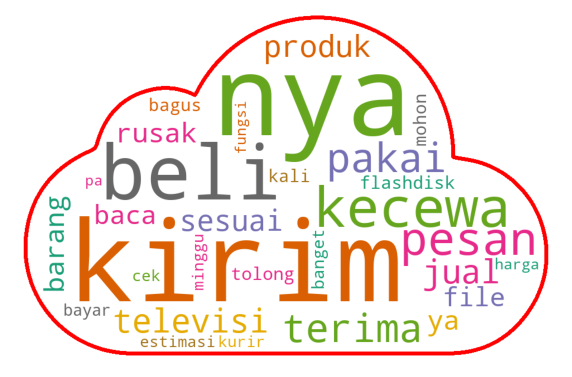

In [ ]:
#Word cloud untuk rating 1

Rating_Buruk1 = data[data.rating==1]
normal_string = []

for t in Rating_Buruk1.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='red',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

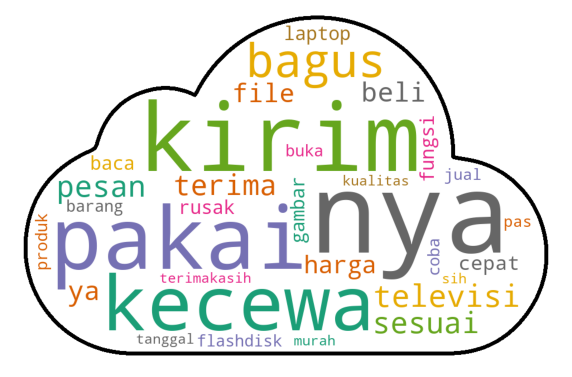

In [ ]:
#Word cloud untuk rating 2

Rating_Buruk2 = data[data.rating==2]
normal_string = []

for t in Rating_Buruk2.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='black',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

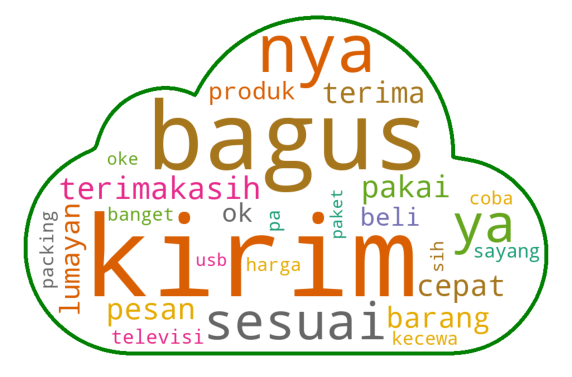

In [ ]:
#Word cloud untuk rating 3

Rating_Netral = data[data.rating==3]
normal_string = []

for t in Rating_Netral.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='green',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

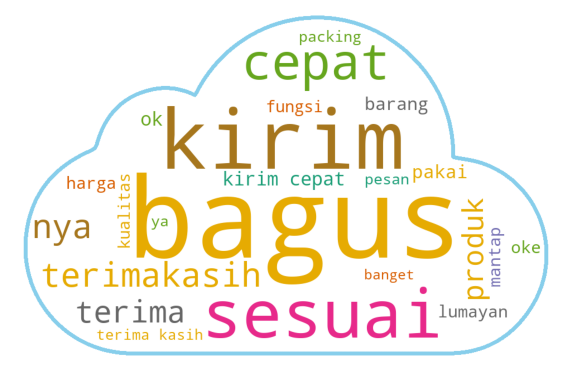

In [ ]:
#Word cloud untuk rating 4

rating_Bagus1 = data[data.rating==4]
normal_string = []

for t in rating_Bagus1.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='skyblue',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

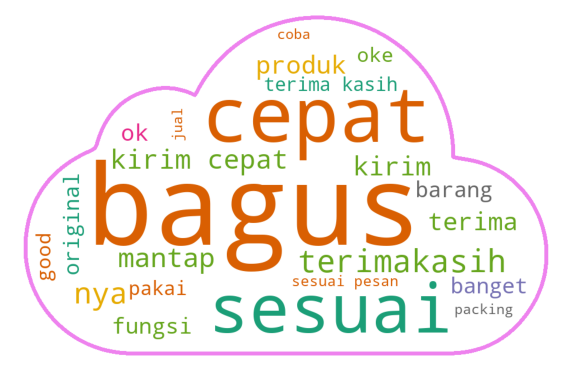

In [ ]:
#Word cloud untuk rating 5

Rating_Bagus2= data[data.rating==5]
normal_string = []

for t in Rating_Bagus2.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='violet',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

! Ingat <br>
Kolom Ratings adalah target anda.

Tugas Anda:
- mahasiswa ditugaskan untuk menemukan model terbaik. Mahasiswa bisa menggunakan algoritme supervised learning lainnya

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam membuat model ML dan proses evaluasinya

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa



##  Resume Model

Support vector machine dan Naive bayes MultinomialNB digunakan dalam membuat model diatas, dan didapatkan bahawa Naive bayes memiliki akurasi sebesar 45,4% dan presisi 64,65%. dan telah dilakukan pula dengan menggunakan SVM hasilnya akurasi dan presisi jadi lebih kecil daripada menggunakan Naive Bayes MultinomialNB.

N-gram range yang diubah juga berpengaruh pada model dimana optimal menggunakan n-gram 1,1